In [16]:
# 05 april assignmemnt

In [17]:
# import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
understand the distribution and relationships between the variables.

In [18]:
dataset=pd.read_csv('diabetes.csv')

In [19]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [21]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [22]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot: >

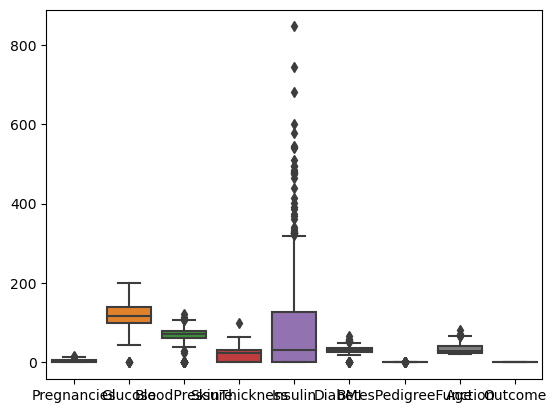

In [23]:

import seaborn as sns
sns.boxplot(dataset)

<AxesSubplot: >

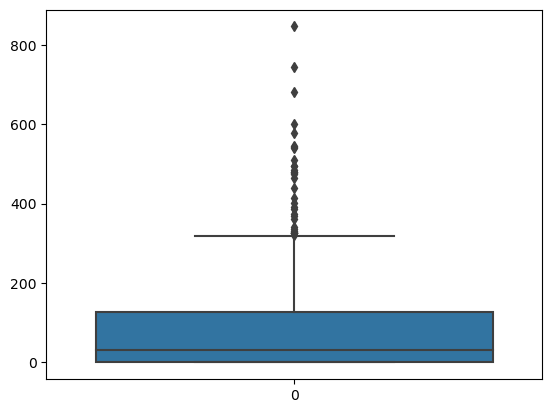

In [24]:
sns.boxplot(dataset['Insulin'])

sns.pairplot(dataset)

In [ ]:
Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
variables into dummy variables if necessary.

In [25]:
# data cleaning
df=dataset
df.isnull().sum() ## no missing value,no need of transformation in datatype

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [26]:
# segregate independent and dependent data
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [27]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [28]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [31]:
x.shape,y.shape

((768, 8), (768,))

In [29]:
# train the model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)


In [32]:
x_train.shape,x_test.shape

((576, 8), (192, 8))

In [33]:
# feature selection based on correlation
x_train.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.138674,0.158280,-0.073347,-0.073807,0.036466,-0.023148,0.548398
Glucose,0.138674,1.000000,0.156389,0.023878,0.348452,0.210237,0.158231,0.258958
BloodPressure,0.158280,0.156389,1.000000,0.161798,0.069441,0.224697,0.034222,0.241381
SkinThickness,-0.073347,0.023878,0.161798,1.000000,0.421019,0.376571,0.171797,-0.150866
Insulin,-0.073807,0.348452,0.069441,0.421019,1.000000,0.178234,0.161418,-0.046338
BMI,0.036466,0.210237,0.224697,0.376571,0.178234,1.000000,0.123487,0.017513
DiabetesPedigreeFunction,-0.023148,0.158231,0.034222,0.171797,0.161418,0.123487,1.000000,0.026399
Age,0.548398,0.258958,0.241381,-0.150866,-0.046338,0.017513,0.026399,1.000000


Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
cross-validation to optimize the hyperparameters and avoid overfitting.

In [34]:
# decision tree

from sklearn.tree import DecisionTreeClassifier

In [35]:
classifier=DecisionTreeClassifier(criterion='entropy')

In [36]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.5264353197674418, 0.9705882352941176, 'x[1] <= 143.5\nentropy = 0.93\nsamples = 576\nvalue = [377, 199]'),
 Text(0.19385901162790697, 0.9117647058823529, 'x[5] <= 26.35\nentropy = 0.788\nsamples = 454\nvalue = [347, 107]'),
 Text(0.046511627906976744, 0.8529411764705882, 'x[1] <= 124.5\nentropy = 0.212\nsamples = 119\nvalue = [115, 4]'),
 Text(0.023255813953488372, 0.7941176470588235, 'x[6] <= 0.675\nentropy = 0.081\nsamples = 100\nvalue = [99, 1]'),
 Text(0.011627906976744186, 0.7352941176470589, 'entropy = 0.0\nsamples = 85\nvalue = [85, 0]'),
 Text(0.03488372093023256, 0.7352941176470589, 'x[6] <= 0.705\nentropy = 0.353\nsamples = 15\nvalue = [14, 1]'),
 Text(0.023255813953488372, 0.6764705882352942, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.046511627906976744, 0.6764705882352942, 'entropy = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.06976744186046512, 0.7941176470588235, 'x[0] <= 2.5\nentropy = 0.629\nsamples = 19\nvalue = [16, 3]'),
 Text(0.0581395348837209

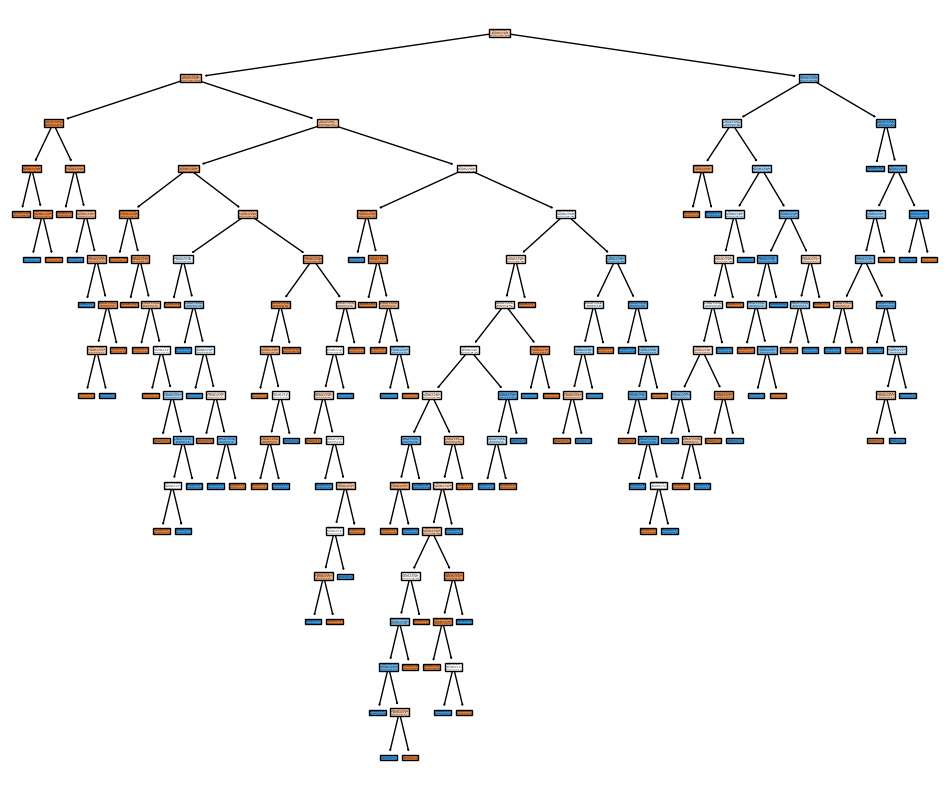

In [37]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(classifier,filled=True)

In [42]:
# post pruning
classifier=DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [43]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5, 0.875, 'x[1] <= 143.5\nentropy = 0.93\nsamples = 576\nvalue = [377, 199]'),
 Text(0.25, 0.625, 'x[5] <= 26.35\nentropy = 0.788\nsamples = 454\nvalue = [347, 107]'),
 Text(0.125, 0.375, 'x[1] <= 124.5\nentropy = 0.212\nsamples = 119\nvalue = [115, 4]'),
 Text(0.0625, 0.125, 'entropy = 0.081\nsamples = 100\nvalue = [99, 1]'),
 Text(0.1875, 0.125, 'entropy = 0.629\nsamples = 19\nvalue = [16, 3]'),
 Text(0.375, 0.375, 'x[7] <= 28.5\nentropy = 0.89\nsamples = 335\nvalue = [232, 103]'),
 Text(0.3125, 0.125, 'entropy = 0.638\nsamples = 167\nvalue = [140, 27]'),
 Text(0.4375, 0.125, 'entropy = 0.993\nsamples = 168\nvalue = [92, 76]'),
 Text(0.75, 0.625, 'x[1] <= 166.5\nentropy = 0.805\nsamples = 122\nvalue = [30, 92]'),
 Text(0.625, 0.375, 'x[7] <= 24.5\nentropy = 0.959\nsamples = 63\nvalue = [24, 39]'),
 Text(0.5625, 0.125, 'entropy = 0.592\nsamples = 7\nvalue = [6, 1]'),
 Text(0.6875, 0.125, 'entropy = 0.906\nsamples = 56\nvalue = [18, 38]'),
 Text(0.875, 0.375, 'x[1] <= 178.5\nen

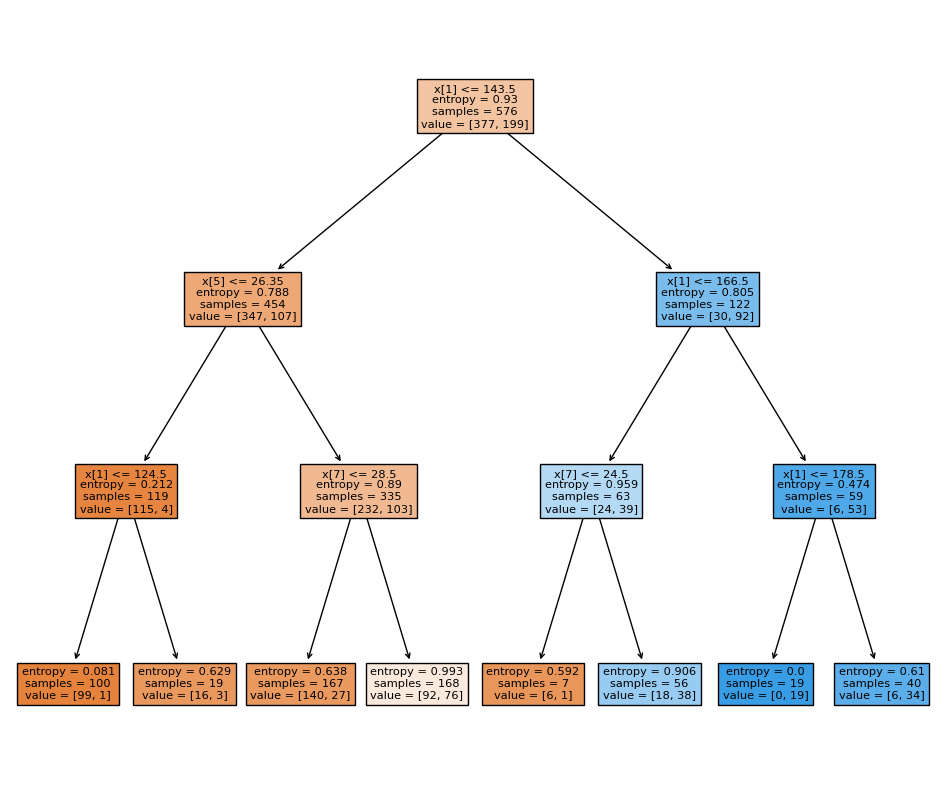

In [44]:
plt.figure(figsize=(12,10))
tree.plot_tree(classifier,filled=True)

In [45]:
# prediction
y_pred=classifier.predict(x_test)

In [46]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [48]:
# accuracy check
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))

0.71875
              precision    recall  f1-score   support

           0       0.85      0.74      0.80       141
           1       0.48      0.65      0.55        51

    accuracy                           0.72       192
   macro avg       0.67      0.70      0.67       192
weighted avg       0.75      0.72      0.73       192



Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
trends.

Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
risks.

In [49]:
# prediction
y_pred=classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])